# Titanic - Machine Learning from Disasters

RMS Titanic was a British passenger liner operated by the White Star Line that sank in the North Atlantic Ocean in the early morning 
hours of 15 April 1912, after striking an iceberg during her maiden voyage from Southampton to New York City. Of the estimated 2,224
passengers and crew aboard, more than 1,500 died, making the sinking one of modern history's deadliest peacetime commercial marine disasters. 
RMS Titanic was the largest ship afloat at the time she entered service and was the second of three Olympic-class ocean liners 
operated by the White Star Line. She was built by the Harland and Wolff shipyard in Belfast. Thomas Andrews, chief naval architect 
of the shipyard at the time, died in the disaster.

# here we will try to predict the survival rate i.e the passenger survived (1) or not(0)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


# import all the necessary modules given below
such as ****SKLEARN,NUMPY,PANDAS****

here the line %matplotlib inline helps you to plot all the graphs within the cell and thus avoiding a new dialogue box and making the code look clean.

I have used Decision Tree Classifier here to achive a good accuracy.
StandardScaler is used so as to  standardized '***Pclass***'  column so that the model does not get biased.

OneHotEncoder:
The input to this transformer should be an array-like of integers or strings, denoting the values taken on by categorical (discrete) features. The features are encoded using a one-hot (aka ‘one-of-K’ or ‘dummy’) encoding scheme. This creates a binary column for each category and returns a sparse matrix or dense array (depending on the sparse parameter).

Here we have used this in '***sex***' column.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split , cross_validate
from sklearn.metrics import accuracy_score , precision_score
from sklearn.preprocessing import StandardScaler , OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Read the training and testing data

In [3]:
train = '../input/titanic/train.csv'
train = pd.read_csv(train)

test = '../input/titanic/test.csv'
test = pd.read_csv(test)

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Now here we'll try to find a pattern 

while sinking , originally women and children were preferred more to save compared to that of men.
classes('***Pclass***' here) of the respective passenger was also taken in consideration.

**so here, we compared the probablity of surviving of the respective passenger belonging to their gender.**

next code represents the total count of the passengers who could not survived in each gender.

i.e

**468 MEN  &  81 WOMEN**

In [6]:
train[train.Survived<1].Sex.value_counts()        #that could not survived

male      468
female     81
Name: Sex, dtype: int64

here we count the total number of the passengers who survived the wreck 

i.e.

**109 MALE & 233 WOMEN**

In [7]:
train[train.Survived>0].Sex.value_counts()         #the one survived

female    233
male      109
Name: Sex, dtype: int64

# Plotting the Graph
**here we will plot the graph showcasing the count of the each MALE and FEMALE that died and survived that wreck.**

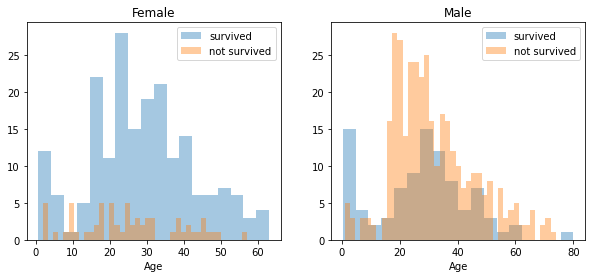

In [8]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))

women = train[train['Sex']=='female']

men = train[train['Sex']=='male']

ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

the next cell shows the comparision between class and the survival chance of the passengers.

**i.e to show how class of passenger was linked to his/her survival chances.**

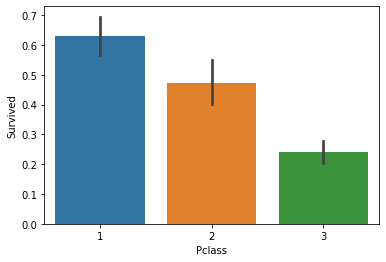

In [9]:
sns.barplot(x='Pclass',y='Survived',data=train)
plt.show()

# since, we can see that there is a relation.
now we know on which columns do we need to work.

# Data Preprocessing

checking for null values

In [10]:
train['Pclass'].isnull().sum()

0

In [11]:
train['Sex'].isnull().sum()

0

In [12]:
train['Age'].isnull().sum()

177

In [13]:
train["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

**Filling the null values of 'Age' with the mean of the 'Age'**

In [14]:
train['Age'].fillna(value=29,inplace = True)

In [15]:
train.head(10)  

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [16]:
features = ['Pclass']


ss = StandardScaler()

train_ss = pd.DataFrame(data = train)
train_ss[features] = ss.fit_transform(train_ss[features])

In [17]:
train_ss.head(11)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,0.827377,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,-1.566107,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,0.827377,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,-1.566107,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,0.827377,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,0.827377,"Moran, Mr. James",male,29.0,0,0,330877,8.4583,NaN,Q
6,7,0,-1.566107,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,0.827377,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,0.827377,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,-0.369365,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


**we can use OneHotEncoder here too but i was unable to do so, because of which i had to go an easy way**

Here we have replaced all the categorical values to a dummy values so that while fitting model gets all the values in numerical form.

In [18]:
train_ss.replace(to_replace ="male",value =1,inplace = True) 
train_ss.replace(to_replace ="female",value =0,inplace = True)

In [19]:
train_ss

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,0.827377,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,-1.566107,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,0.827377,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,-1.566107,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,0.827377,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,-0.369365,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
887,888,1,-1.566107,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
888,889,0,0.827377,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,-1.566107,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


**same is done for the TEST dataset**

In [20]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [21]:
test['Age'].isnull().sum()

86

In [22]:
test["Age"].describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

In [23]:
test['Age'].fillna(value=30,inplace = True)

In [24]:
features = ['Pclass']


ss = StandardScaler()

test_ss = pd.DataFrame(data = test)
test_ss[features] = ss.fit_transform(test_ss[features])

In [25]:
test_ss.replace(to_replace ="male",value =1,inplace = True) 
test_ss.replace(to_replace ="female",value =0,inplace = True)

In [26]:
y_train = train_ss[['Survived']]

print(y_train)

     Survived
0           0
1           1
2           1
3           1
4           0
..        ...
886         0
887         1
888         0
889         1
890         0

[891 rows x 1 columns]


In [27]:
ft = ['Pclass','Sex','Age','SibSp','Parch']

x =(train_ss[ft])
x_test =(test_ss[ft])

**Now it is time for us to Fit the model we made so far**

**Here we will use Decision Tree Classifier**



In [28]:

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x, y_train)
pred = decision_tree.predict(x_test)
acc_decision_tree = round(decision_tree.score(x, y_train) * 100, 2)
acc_decision_tree

91.81

**the code below helps us to save the predicted values in a csv file which can be later downloaded.**



In [29]:
output = pd.DataFrame({'PassengerId': test_ss.PassengerId, 'Survived': pred})
output.to_csv('my_new_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [30]:
print(output)

     PassengerId  Survived
0            892         0
1            893         0
2            894         1
3            895         1
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]
